# 주제 : 서울특별시 자치구별 화재 및 지진 현황과 대피소 현황

```
역할
 - 코딩 : 김경민, 임수빈
 - 보고서 : 이지호
 - 발표 : 오예진
```

0. 공통 모듈 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!pip install koreanize-matplotlib
!pip install xlrd openpyxl
!pip install pyproj

import koreanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from pyproj import Proj, transform
import math

from google.colab import drive
drive.mount('/content/drive')

In [18]:
data1 = pd.read_csv('/content/drive/MyDrive/서울시_서소위치_위치정보.csv', encoding='ms949')
data2 = pd.read_csv('/content/drive/MyDrive/서울시_소방용수시설_현황.csv', encoding='ms949')
data3 = pd.read_csv('/content/drive/MyDrive/서울시_화재발생_현황.csv', encoding='utf-8')
data4 = pd.read_csv('/content/drive/MyDrive/소방서_1개소당_담당인구.csv', encoding='utf-8')

1. 시도별 화재 건수

<ipython-input-19-176875d7dcea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  화재건수.rename(columns = {'동별(2)':'동별'}, inplace= True)
<ipython-input-19-176875d7dcea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  화재건수.rename(columns = {'2022'   :'소계'}, inplace= True)
<ipython-input-19-176875d7dcea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  화재건수.rename(columns = {'2022.1' :'실화'}, inplace= True)
<ipython-input-19-176875d7dcea>:6

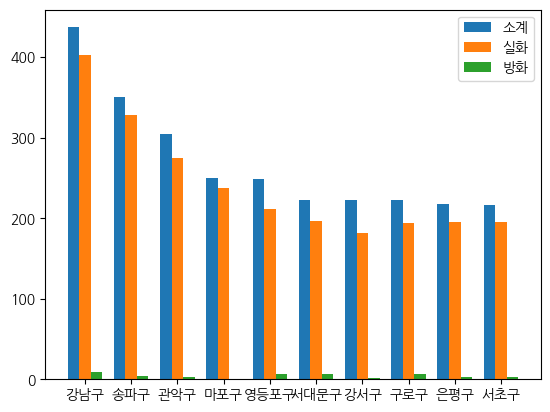

In [19]:
화재건수 = data3[4:]

화재건수.rename(columns = {'동별(2)':'동별'}, inplace= True)
화재건수.rename(columns = {'2022'   :'소계'}, inplace= True)
화재건수.rename(columns = {'2022.1' :'실화'}, inplace= True)
화재건수.rename(columns = {'2022.2' :'방화'}, inplace= True)
화재건수 = 화재건수.sort_values(['소계'], ascending=False).head(10)
화재건수.reset_index(drop=True, inplace=True)

구청 = 화재건수["동별"]
소계 = 화재건수["소계"].apply(pd.to_numeric, errors='coerce')
실화 = 화재건수["실화"].apply(pd.to_numeric, errors='coerce')
방화 = 화재건수["방화"].apply(pd.to_numeric, errors='coerce')

pos =  np.arange(len(구청))
plt.xticks(pos, 구청)
plt.bar(pos-0.25, 소계, label='소계', width=0.25)
plt.bar(pos     , 실화, label='실화', width=0.25)
plt.bar(pos+0.25, 방화, label='방화', width=0.25)
plt.legend()

plt.show()

2. 소방용수시설 밀집도를 구청별로 지도에 표현

In [20]:
map = folium.Map(location=[37.4965, 126.9572],
                        zoom_start=11,
                        control_scale=True,
                        tiles='openstreetmap')

SeoGu_geo = '''{"type":"FeatureCollection", "features": [
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.012,37.582],[127.015,37.582],[127.016,37.582],[127.017,37.582],[127.017,37.581],[127.017,37.58],[127.018,37.58],[127.018,37.579],[127.018,37.578],[127.019,37.578],[127.02,37.578],[127.019,37.578],[127.02,37.578],[127.02,37.579],[127.021,37.579],[127.022,37.579],[127.023,37.578],[127.023,37.577],[127.023,37.576],[127.023,37.575],[127.023,37.572],[127.018,37.57],[127.015,37.57],[127.001,37.569],[126.997,37.569],[126.99,37.568],[126.976,37.569],[126.969,37.568],[126.967,37.566],[126.954,37.579],[126.957,37.58],[126.958,37.584],[126.958,37.594],[126.958,37.598],[126.953,37.6],[126.954,37.605],[126.951,37.608],[126.95,37.611],[126.951,37.614],[126.949,37.623],[126.95,37.626],[126.958,37.629],[126.964,37.63],[126.966,37.631],[126.973,37.632],[126.975,37.632],[126.975,37.631],[126.976,37.629],[126.977,37.629],[126.978,37.629],[126.979,37.629],[126.98,37.629],[126.98,37.628],[126.982,37.624],[126.984,37.621],[126.985,37.616],[126.985,37.615],[126.987,37.614],[126.986,37.613],[126.987,37.604],[126.986,37.604],[126.986,37.603],[126.983,37.602],[126.981,37.602],[126.98,37.601],[126.979,37.601],[126.978,37.601],[126.978,37.6],[126.977,37.599],[126.977,37.598],[126.978,37.598],[126.978,37.597],[126.979,37.597],[126.979,37.596],[126.981,37.596],[126.981,37.595],[126.982,37.595],[126.983,37.595],[126.984,37.594],[126.985,37.594],[126.986,37.594],[126.986,37.593],[126.987,37.593],[126.988,37.592],[126.989,37.592],[126.994,37.592],[126.995,37.592],[126.996,37.592],[126.997,37.592],[126.998,37.592],[126.999,37.592],[127,37.592],[127.001,37.592],[127.002,37.591],[127.001,37.591],[127.001,37.59],[127.002,37.59],[127.002,37.589],[127.003,37.589],[127.003,37.588],[127.004,37.588],[127.007,37.586],[127.007,37.585],[127.007,37.584],[127.007,37.582],[127.008,37.581],[127.012,37.582]]]},"properties":{"SIG_CD":"11110","SIG_ENG_NM":"Jongno-gu","SIG_KOR_NM":"종로구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.023,37.572],[127.024,37.567],[127.027,37.563],[127.022,37.558],[127.02,37.557],[127.018,37.557],[127.016,37.553],[127.016,37.552],[127.01,37.548],[127.009,37.544],[127.005,37.546],[127.004,37.55],[126.998,37.55],[126.994,37.547],[126.991,37.551],[126.979,37.554],[126.976,37.553],[126.972,37.555],[126.966,37.554],[126.962,37.555],[126.963,37.559],[126.969,37.562],[126.967,37.566],[126.969,37.568],[126.976,37.569],[126.99,37.568],[126.997,37.569],[127.001,37.569],[127.015,37.57],[127.018,37.57],[127.023,37.572]]]},"properties":{"SIG_CD":"11140","SIG_ENG_NM":"Jung-gu","SIG_KOR_NM":"중구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.969,37.556],[126.976,37.553],[126.979,37.554],[126.991,37.551],[126.994,37.547],[126.998,37.55],[127.004,37.55],[127.005,37.546],[127.01,37.539],[127.018,37.538],[127.017,37.534],[127.006,37.523],[126.991,37.513],[126.986,37.507],[126.975,37.507],[126.965,37.511],[126.961,37.513],[126.95,37.518],[126.95,37.527],[126.945,37.534],[126.951,37.536],[126.956,37.539],[126.958,37.545],[126.964,37.55],[126.962,37.552],[126.969,37.556]]]},"properties":{"SIG_CD":"11170","SIG_ENG_NM":"Yongsan-gu","SIG_KOR_NM":"용산구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.072,37.56],[127.074,37.559],[127.067,37.548],[127.064,37.542],[127.058,37.532],[127.056,37.528],[127.046,37.534],[127.04,37.536],[127.037,37.536],[127.033,37.536],[127.032,37.536],[127.023,37.536],[127.021,37.536],[127.02,37.535],[127.017,37.534],[127.018,37.538],[127.01,37.539],[127.009,37.544],[127.01,37.548],[127.016,37.552],[127.016,37.553],[127.018,37.557],[127.02,37.557],[127.022,37.558],[127.027,37.563],[127.024,37.567],[127.023,37.572],[127.031,37.57],[127.033,37.571],[127.034,37.571],[127.042,37.573],[127.048,37.57],[127.059,37.562],[127.072,37.56]]]},"properties":{"SIG_CD":"11200","SIG_ENG_NM":"Seongdong-gu","SIG_KOR_NM":"성동구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.115,37.557],[127.112,37.55],[127.111,37.547],[127.109,37.543],[127.108,37.541],[127.09,37.527],[127.086,37.525],[127.077,37.523],[127.068,37.525],[127.065,37.525],[127.056,37.528],[127.058,37.532],[127.064,37.542],[127.067,37.548],[127.074,37.559],[127.072,37.56],[127.073,37.561],[127.074,37.565],[127.076,37.567],[127.078,37.571],[127.078,37.572],[127.09,37.57],[127.095,37.571],[127.101,37.574],[127.104,37.571],[127.101,37.562],[127.102,37.559],[127.106,37.556],[127.112,37.559],[127.115,37.557]]]},"properties":{"SIG_CD":"11215","SIG_ENG_NM":"Gwangjin-gu","SIG_KOR_NM":"광진구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.071,37.607],[127.071,37.606],[127.073,37.601],[127.072,37.6],[127.071,37.599],[127.07,37.598],[127.069,37.595],[127.071,37.592],[127.071,37.591],[127.07,37.591],[127.07,37.59],[127.071,37.589],[127.072,37.587],[127.073,37.587],[127.072,37.586],[127.072,37.585],[127.073,37.585],[127.073,37.584],[127.074,37.583],[127.074,37.582],[127.076,37.58],[127.077,37.578],[127.077,37.574],[127.077,37.573],[127.078,37.572],[127.078,37.571],[127.076,37.567],[127.074,37.565],[127.073,37.561],[127.072,37.56],[127.059,37.562],[127.048,37.57],[127.042,37.573],[127.034,37.571],[127.033,37.571],[127.031,37.57],[127.023,37.572],[127.023,37.575],[127.023,37.576],[127.023,37.577],[127.023,37.578],[127.024,37.579],[127.025,37.579],[127.025,37.58],[127.026,37.58],[127.026,37.581],[127.027,37.581],[127.029,37.582],[127.029,37.583],[127.03,37.583],[127.031,37.584],[127.031,37.585],[127.032,37.585],[127.032,37.586],[127.034,37.587],[127.034,37.588],[127.035,37.588],[127.036,37.59],[127.036,37.591],[127.037,37.591],[127.041,37.595],[127.041,37.596],[127.042,37.596],[127.042,37.597],[127.045,37.596],[127.046,37.597],[127.046,37.596],[127.047,37.596],[127.049,37.599],[127.05,37.6],[127.052,37.6],[127.06,37.602],[127.06,37.603],[127.061,37.604],[127.061,37.603],[127.061,37.604],[127.062,37.605],[127.063,37.605],[127.067,37.606],[127.069,37.607],[127.07,37.607],[127.071,37.607],[127.071,37.608],[127.071,37.607]]]},"properties":{"SIG_CD":"11230","SIG_ENG_NM":"Dongdaemun-gu","SIG_KOR_NM":"동대문구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.101,37.574],[127.095,37.571],[127.09,37.57],[127.078,37.572],[127.077,37.573],[127.077,37.574],[127.077,37.578],[127.076,37.58],[127.074,37.582],[127.074,37.583],[127.073,37.584],[127.073,37.585],[127.072,37.585],[127.072,37.586],[127.073,37.587],[127.072,37.587],[127.071,37.589],[127.07,37.59],[127.07,37.591],[127.071,37.591],[127.071,37.592],[127.069,37.595],[127.07,37.598],[127.071,37.599],[127.072,37.6],[127.073,37.601],[127.071,37.606],[127.071,37.607],[127.071,37.608],[127.072,37.614],[127.07,37.615],[127.086,37.62],[127.094,37.618],[127.099,37.62],[127.102,37.62],[127.111,37.621],[127.117,37.618],[127.117,37.609],[127.118,37.605],[127.114,37.6],[127.117,37.595],[127.113,37.593],[127.111,37.589],[127.109,37.583],[127.103,37.581],[127.101,37.574]]]},"properties":{"SIG_CD":"11260","SIG_ENG_NM":"Jungnang-gu","SIG_KOR_NM":"중랑구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.008,37.581],[127.007,37.582],[127.007,37.584],[127.007,37.585],[127.007,37.586],[127.004,37.588],[127.003,37.588],[127.003,37.589],[127.002,37.589],[127.002,37.59],[127.001,37.59],[127.001,37.591],[127.002,37.591],[127.001,37.592],[127,37.592],[126.999,37.592],[126.998,37.592],[126.997,37.592],[126.996,37.592],[126.995,37.592],[126.994,37.592],[126.989,37.592],[126.988,37.592],[126.987,37.593],[126.986,37.593],[126.986,37.594],[126.985,37.594],[126.984,37.594],[126.983,37.595],[126.982,37.595],[126.981,37.595],[126.981,37.596],[126.979,37.596],[126.979,37.597],[126.978,37.597],[126.978,37.598],[126.977,37.598],[126.977,37.599],[126.978,37.6],[126.978,37.601],[126.979,37.601],[126.98,37.601],[126.981,37.602],[126.983,37.602],[126.986,37.603],[126.986,37.604],[126.987,37.604],[126.986,37.613],[126.987,37.614],[126.985,37.615],[126.985,37.616],[126.984,37.621],[126.982,37.624],[126.98,37.628],[126.98,37.629],[126.979,37.629],[126.978,37.629],[126.977,37.629],[126.976,37.629],[126.975,37.631],[126.975,37.632],[126.978,37.634],[126.984,37.636],[126.986,37.636],[126.995,37.63],[126.999,37.626],[127.008,37.624],[127.007,37.621],[127.01,37.617],[127.014,37.615],[127.019,37.614],[127.022,37.611],[127.03,37.612],[127.03,37.609],[127.037,37.612],[127.044,37.619],[127.047,37.623],[127.05,37.624],[127.057,37.618],[127.063,37.614],[127.07,37.615],[127.072,37.614],[127.071,37.608],[127.071,37.607],[127.07,37.607],[127.069,37.607],[127.067,37.606],[127.063,37.605],[127.062,37.605],[127.061,37.604],[127.061,37.603],[127.061,37.604],[127.06,37.603],[127.06,37.602],[127.052,37.6],[127.05,37.6],[127.049,37.599],[127.047,37.596],[127.046,37.596],[127.046,37.597],[127.045,37.596],[127.042,37.597],[127.042,37.596],[127.041,37.596],[127.041,37.595],[127.037,37.591],[127.036,37.591],[127.036,37.59],[127.035,37.588],[127.034,37.588],[127.034,37.587],[127.032,37.586],[127.032,37.585],[127.031,37.585],[127.031,37.584],[127.03,37.583],[127.029,37.583],[127.029,37.582],[127.027,37.581],[127.026,37.581],[127.026,37.58],[127.025,37.58],[127.025,37.579],[127.024,37.579],[127.023,37.578],[127.022,37.579],[127.021,37.579],[127.02,37.579],[127.02,37.578],[127.019,37.578],[127.02,37.578],[127.019,37.578],[127.018,37.578],[127.018,37.579],[127.018,37.58],[127.017,37.58],[127.017,37.581],[127.017,37.582],[127.016,37.582],[127.015,37.582],[127.012,37.582],[127.008,37.581]]]},"properties":{"SIG_CD":"11290","SIG_ENG_NM":"Seongbuk-gu","SIG_KOR_NM":"성북구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.005,37.685],[127.009,37.684],[127.009,37.68],[127.012,37.679],[127.014,37.675],[127.018,37.67],[127.016,37.667],[127.012,37.652],[127.018,37.649],[127.021,37.649],[127.025,37.647],[127.033,37.641],[127.035,37.638],[127.038,37.636],[127.04,37.632],[127.047,37.628],[127.05,37.624],[127.047,37.623],[127.044,37.619],[127.037,37.612],[127.03,37.609],[127.03,37.612],[127.022,37.611],[127.019,37.614],[127.014,37.615],[127.01,37.617],[127.007,37.621],[127.008,37.624],[126.999,37.626],[126.995,37.63],[126.986,37.636],[126.986,37.64],[126.983,37.644],[126.985,37.646],[126.984,37.65],[126.98,37.656],[126.983,37.657],[126.987,37.661],[126.988,37.664],[126.992,37.665],[126.994,37.673],[126.993,37.678],[126.997,37.683],[127.005,37.685]]]},"properties":{"SIG_CD":"11305","SIG_ENG_NM":"Gangbuk-gu","SIG_KOR_NM":"강북구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.015,37.649],[127.012,37.652],[127.016,37.667],[127.018,37.67],[127.014,37.675],[127.012,37.679],[127.009,37.68],[127.008,37.692],[127.01,37.693],[127.01,37.697],[127.014,37.699],[127.015,37.701],[127.029,37.699],[127.031,37.693],[127.037,37.693],[127.041,37.695],[127.046,37.692],[127.049,37.694],[127.05,37.688],[127.052,37.683],[127.049,37.675],[127.048,37.67],[127.051,37.664],[127.051,37.66],[127.053,37.658],[127.054,37.651],[127.056,37.647],[127.055,37.64],[127.051,37.645],[127.047,37.64],[127.044,37.633],[127.04,37.632],[127.038,37.636],[127.035,37.638],[127.033,37.641],[127.025,37.647],[127.021,37.649],[127.015,37.649]]]},"properties":{"SIG_CD":"11320","SIG_ENG_NM":"Dobong-gu","SIG_KOR_NM":"도봉구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.106,37.62],[127.099,37.62],[127.094,37.618],[127.086,37.62],[127.076,37.617],[127.063,37.614],[127.057,37.618],[127.05,37.624],[127.047,37.628],[127.042,37.631],[127.044,37.633],[127.047,37.64],[127.051,37.645],[127.055,37.64],[127.056,37.647],[127.054,37.651],[127.053,37.658],[127.051,37.66],[127.051,37.664],[127.048,37.67],[127.049,37.675],[127.052,37.683],[127.052,37.687],[127.06,37.69],[127.063,37.695],[127.073,37.694],[127.075,37.695],[127.081,37.696],[127.084,37.694],[127.087,37.69],[127.096,37.689],[127.096,37.686],[127.093,37.682],[127.092,37.678],[127.096,37.673],[127.096,37.669],[127.094,37.663],[127.091,37.659],[127.094,37.652],[127.092,37.65],[127.095,37.645],[127.098,37.644],[127.104,37.645],[127.108,37.645],[127.111,37.642],[127.111,37.639],[127.112,37.636],[127.112,37.632],[127.106,37.627],[127.104,37.622],[127.106,37.62]]]},"properties":{"SIG_CD":"11350","SIG_ENG_NM":"Nowon-gu","SIG_KOR_NM":"노원구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.955,37.654],[126.957,37.653],[126.96,37.641],[126.963,37.633],[126.962,37.632],[126.958,37.629],[126.95,37.626],[126.949,37.623],[126.951,37.614],[126.95,37.611],[126.942,37.605],[126.94,37.602],[126.941,37.599],[126.933,37.596],[126.928,37.592],[126.928,37.588],[126.924,37.587],[126.921,37.583],[126.916,37.583],[126.916,37.586],[126.912,37.586],[126.902,37.577],[126.889,37.585],[126.882,37.591],[126.886,37.594],[126.887,37.594],[126.886,37.592],[126.885,37.591],[126.887,37.589],[126.897,37.589],[126.9,37.59],[126.899,37.593],[126.902,37.595],[126.901,37.598],[126.9,37.602],[126.902,37.606],[126.901,37.607],[126.9,37.611],[126.903,37.619],[126.905,37.619],[126.907,37.624],[126.907,37.625],[126.909,37.629],[126.907,37.633],[126.911,37.635],[126.91,37.639],[126.912,37.644],[126.906,37.648],[126.91,37.647],[126.91,37.646],[126.911,37.646],[126.915,37.645],[126.916,37.645],[126.924,37.646],[126.928,37.649],[126.933,37.65],[126.933,37.651],[126.935,37.651],[126.936,37.651],[126.94,37.656],[126.94,37.657],[126.948,37.659],[126.948,37.657],[126.955,37.654]]]},"properties":{"SIG_CD":"11380","SIG_ENG_NM":"Eunpyeong-gu","SIG_KOR_NM":"은평구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.962,37.559],[126.956,37.557],[126.941,37.557],[126.937,37.555],[126.927,37.559],[126.928,37.563],[126.925,37.566],[126.918,37.567],[126.908,37.572],[126.902,37.576],[126.912,37.586],[126.916,37.586],[126.916,37.583],[126.921,37.583],[126.924,37.587],[126.928,37.588],[126.928,37.592],[126.933,37.596],[126.941,37.599],[126.94,37.602],[126.942,37.605],[126.949,37.609],[126.954,37.605],[126.953,37.6],[126.958,37.598],[126.958,37.594],[126.958,37.584],[126.957,37.58],[126.954,37.579],[126.968,37.565],[126.969,37.562],[126.962,37.559]]]},"properties":{"SIG_CD":"11410","SIG_ENG_NM":"Seodaemun-gu","SIG_KOR_NM":"서대문구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.902,37.576],[126.908,37.572],[126.918,37.567],[126.925,37.566],[126.928,37.563],[126.927,37.559],[126.937,37.555],[126.941,37.557],[126.956,37.557],[126.962,37.559],[126.962,37.555],[126.964,37.55],[126.958,37.545],[126.956,37.539],[126.951,37.536],[126.945,37.534],[126.935,37.539],[126.934,37.54],[126.93,37.541],[126.929,37.54],[126.928,37.54],[126.923,37.541],[126.922,37.541],[126.917,37.541],[126.905,37.541],[126.901,37.546],[126.899,37.548],[126.888,37.552],[126.881,37.556],[126.88,37.556],[126.866,37.563],[126.856,37.569],[126.854,37.574],[126.865,37.577],[126.876,37.578],[126.878,37.586],[126.882,37.591],[126.889,37.585],[126.902,37.576]]]},"properties":{"SIG_CD":"11440","SIG_ENG_NM":"Mapo-gu","SIG_KOR_NM":"마포구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.879,37.518],[126.88,37.518],[126.879,37.517],[126.879,37.518],[126.879,37.517],[126.878,37.516],[126.878,37.515],[126.878,37.514],[126.878,37.513],[126.877,37.514],[126.876,37.513],[126.875,37.512],[126.874,37.511],[126.875,37.511],[126.875,37.512],[126.876,37.511],[126.877,37.511],[126.876,37.511],[126.875,37.511],[126.875,37.51],[126.876,37.51],[126.875,37.51],[126.875,37.509],[126.874,37.509],[126.874,37.508],[126.875,37.508],[126.875,37.507],[126.874,37.507],[126.875,37.507],[126.875,37.506],[126.874,37.506],[126.874,37.505],[126.874,37.504],[126.873,37.504],[126.872,37.504],[126.871,37.505],[126.871,37.506],[126.869,37.505],[126.867,37.505],[126.866,37.505],[126.866,37.506],[126.865,37.506],[126.865,37.505],[126.864,37.505],[126.863,37.506],[126.863,37.507],[126.864,37.508],[126.863,37.508],[126.862,37.507],[126.861,37.507],[126.86,37.507],[126.859,37.508],[126.857,37.51],[126.854,37.51],[126.852,37.51],[126.851,37.51],[126.85,37.51],[126.848,37.509],[126.847,37.509],[126.846,37.509],[126.846,37.508],[126.845,37.508],[126.845,37.507],[126.844,37.506],[126.842,37.506],[126.839,37.504],[126.838,37.504],[126.835,37.503],[126.834,37.503],[126.834,37.504],[126.833,37.504],[126.832,37.505],[126.831,37.506],[126.831,37.508],[126.829,37.509],[126.828,37.509],[126.827,37.509],[126.824,37.511],[126.823,37.516],[126.826,37.52],[126.825,37.523],[126.828,37.527],[126.822,37.535],[126.822,37.541],[126.825,37.542],[126.828,37.548],[126.83,37.546],[126.83,37.542],[126.833,37.542],[126.834,37.536],[126.84,37.526],[126.864,37.53],[126.864,37.54],[126.862,37.544],[126.864,37.551],[126.872,37.547],[126.881,37.548],[126.885,37.543],[126.886,37.54],[126.89,37.534],[126.887,37.53],[126.879,37.525],[126.879,37.518]]]},"properties":{"SIG_CD":"11470","SIG_ENG_NM":"Yangcheon-gu","SIG_KOR_NM":"양천구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.809,37.601],[126.818,37.595],[126.819,37.593],[126.828,37.587],[126.832,37.586],[126.843,37.579],[126.854,37.572],[126.856,37.569],[126.866,37.563],[126.88,37.556],[126.878,37.553],[126.88,37.548],[126.872,37.547],[126.864,37.551],[126.862,37.544],[126.864,37.54],[126.864,37.53],[126.84,37.526],[126.834,37.536],[126.833,37.542],[126.83,37.542],[126.83,37.546],[126.828,37.548],[126.825,37.542],[126.822,37.541],[126.812,37.541],[126.807,37.544],[126.802,37.543],[126.799,37.54],[126.799,37.538],[126.794,37.537],[126.795,37.541],[126.792,37.542],[126.787,37.546],[126.778,37.547],[126.775,37.549],[126.772,37.548],[126.767,37.554],[126.77,37.557],[126.776,37.562],[126.775,37.566],[126.78,37.567],[126.782,37.574],[126.788,37.576],[126.796,37.583],[126.801,37.59],[126.799,37.591],[126.797,37.598],[126.803,37.605],[126.809,37.601]]]},"properties":{"SIG_CD":"11500","SIG_ENG_NM":"Gangseo-gu","SIG_KOR_NM":"강서구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.879,37.518],[126.885,37.514],[126.892,37.51],[126.894,37.505],[126.893,37.503],[126.896,37.489],[126.903,37.484],[126.902,37.484],[126.901,37.483],[126.901,37.482],[126.9,37.481],[126.899,37.48],[126.899,37.479],[126.898,37.479],[126.896,37.479],[126.895,37.479],[126.891,37.479],[126.89,37.479],[126.889,37.48],[126.888,37.48],[126.888,37.481],[126.887,37.481],[126.887,37.482],[126.886,37.482],[126.886,37.483],[126.885,37.483],[126.884,37.484],[126.883,37.484],[126.883,37.485],[126.882,37.485],[126.881,37.486],[126.879,37.486],[126.878,37.487],[126.875,37.485],[126.876,37.487],[126.877,37.488],[126.877,37.489],[126.876,37.489],[126.874,37.489],[126.873,37.488],[126.873,37.49],[126.874,37.49],[126.875,37.49],[126.874,37.49],[126.875,37.491],[126.874,37.491],[126.873,37.491],[126.872,37.491],[126.871,37.491],[126.872,37.49],[126.871,37.49],[126.87,37.49],[126.87,37.491],[126.869,37.492],[126.87,37.492],[126.87,37.493],[126.869,37.493],[126.87,37.494],[126.869,37.495],[126.868,37.495],[126.867,37.494],[126.868,37.494],[126.867,37.493],[126.866,37.493],[126.866,37.492],[126.865,37.492],[126.865,37.491],[126.864,37.491],[126.863,37.491],[126.862,37.491],[126.858,37.486],[126.856,37.486],[126.856,37.485],[126.855,37.485],[126.854,37.484],[126.854,37.483],[126.853,37.482],[126.851,37.482],[126.849,37.482],[126.848,37.482],[126.847,37.482],[126.846,37.482],[126.846,37.481],[126.846,37.48],[126.846,37.479],[126.846,37.477],[126.846,37.476],[126.845,37.474],[126.844,37.474],[126.843,37.475],[126.842,37.475],[126.841,37.475],[126.84,37.475],[126.839,37.475],[126.838,37.475],[126.837,37.475],[126.836,37.475],[126.836,37.474],[126.835,37.476],[126.834,37.476],[126.833,37.477],[126.828,37.476],[126.815,37.476],[126.819,37.479],[126.819,37.486],[126.824,37.488],[126.823,37.49],[126.815,37.493],[126.813,37.496],[126.82,37.499],[126.822,37.502],[126.822,37.508],[126.827,37.509],[126.828,37.509],[126.829,37.509],[126.831,37.508],[126.831,37.506],[126.832,37.505],[126.833,37.504],[126.834,37.504],[126.834,37.503],[126.835,37.503],[126.838,37.504],[126.839,37.504],[126.842,37.506],[126.844,37.506],[126.845,37.507],[126.845,37.508],[126.846,37.508],[126.846,37.509],[126.847,37.509],[126.848,37.509],[126.85,37.51],[126.851,37.51],[126.852,37.51],[126.854,37.51],[126.857,37.51],[126.859,37.508],[126.86,37.507],[126.861,37.507],[126.862,37.507],[126.863,37.508],[126.864,37.508],[126.863,37.507],[126.863,37.506],[126.864,37.505],[126.865,37.505],[126.865,37.506],[126.866,37.506],[126.866,37.505],[126.867,37.505],[126.869,37.505],[126.871,37.506],[126.871,37.505],[126.872,37.504],[126.873,37.504],[126.874,37.504],[126.874,37.505],[126.874,37.506],[126.875,37.506],[126.875,37.507],[126.874,37.507],[126.875,37.507],[126.875,37.508],[126.874,37.508],[126.874,37.509],[126.875,37.509],[126.875,37.51],[126.876,37.51],[126.875,37.51],[126.875,37.511],[126.876,37.511],[126.877,37.511],[126.876,37.511],[126.875,37.512],[126.875,37.511],[126.874,37.511],[126.875,37.512],[126.876,37.513],[126.877,37.514],[126.878,37.513],[126.878,37.514],[126.878,37.515],[126.878,37.516],[126.879,37.517],[126.879,37.518],[126.879,37.517],[126.88,37.518],[126.879,37.518]]]},"properties":{"SIG_CD":"11530","SIG_ENG_NM":"Guro-gu","SIG_KOR_NM":"구로구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.875,37.485],[126.878,37.487],[126.879,37.486],[126.881,37.486],[126.882,37.485],[126.883,37.485],[126.883,37.484],[126.884,37.484],[126.885,37.483],[126.886,37.483],[126.886,37.482],[126.887,37.482],[126.887,37.481],[126.888,37.481],[126.888,37.48],[126.889,37.48],[126.89,37.479],[126.891,37.479],[126.895,37.479],[126.896,37.479],[126.898,37.479],[126.899,37.479],[126.904,37.48],[126.905,37.48],[126.909,37.479],[126.909,37.478],[126.911,37.475],[126.909,37.473],[126.908,37.473],[126.91,37.469],[126.914,37.465],[126.913,37.463],[126.914,37.458],[126.916,37.457],[126.921,37.457],[126.922,37.457],[126.923,37.454],[126.928,37.451],[126.928,37.45],[126.919,37.44],[126.912,37.439],[126.909,37.434],[126.903,37.434],[126.899,37.439],[126.9,37.44],[126.894,37.453],[126.89,37.453],[126.888,37.456],[126.886,37.461],[126.883,37.464],[126.885,37.466],[126.88,37.471],[126.88,37.472],[126.876,37.477],[126.872,37.485],[126.875,37.485]]]},"properties":{"SIG_CD":"11545","SIG_ENG_NM":"Geumcheon-gu","SIG_KOR_NM":"금천구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.88,37.556],[126.881,37.556],[126.888,37.552],[126.899,37.548],[126.901,37.546],[126.905,37.541],[126.917,37.541],[126.922,37.541],[126.923,37.541],[126.928,37.54],[126.929,37.54],[126.93,37.541],[126.934,37.54],[126.935,37.539],[126.945,37.534],[126.95,37.527],[126.95,37.518],[126.939,37.516],[126.927,37.516],[126.919,37.498],[126.912,37.496],[126.903,37.485],[126.898,37.487],[126.896,37.489],[126.893,37.503],[126.894,37.505],[126.892,37.51],[126.885,37.514],[126.878,37.518],[126.879,37.521],[126.879,37.525],[126.887,37.53],[126.89,37.534],[126.886,37.54],[126.885,37.543],[126.878,37.552],[126.88,37.556]]]},"properties":{"SIG_CD":"11560","SIG_ENG_NM":"Yeongdeungpo-gu","SIG_KOR_NM":"영등포구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.98,37.507],[126.981,37.503],[126.985,37.499],[126.984,37.498],[126.983,37.494],[126.983,37.493],[126.983,37.492],[126.983,37.491],[126.982,37.477],[126.971,37.475],[126.968,37.477],[126.968,37.478],[126.961,37.484],[126.962,37.485],[126.961,37.491],[126.961,37.492],[126.954,37.491],[126.949,37.493],[126.948,37.494],[126.947,37.494],[126.945,37.493],[126.944,37.493],[126.944,37.492],[126.94,37.493],[126.939,37.492],[126.932,37.493],[126.931,37.493],[126.93,37.494],[126.928,37.495],[126.926,37.493],[126.925,37.492],[126.925,37.491],[126.922,37.49],[126.919,37.49],[126.915,37.489],[126.914,37.488],[126.913,37.488],[126.913,37.487],[126.912,37.487],[126.903,37.485],[126.912,37.496],[126.919,37.498],[126.927,37.516],[126.939,37.516],[126.95,37.518],[126.961,37.513],[126.965,37.511],[126.975,37.507],[126.98,37.507]]]},"properties":{"SIG_CD":"11590","SIG_ENG_NM":"Dongjak-gu","SIG_KOR_NM":"동작구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[126.928,37.495],[126.93,37.494],[126.931,37.493],[126.932,37.493],[126.939,37.492],[126.94,37.493],[126.944,37.492],[126.944,37.493],[126.945,37.493],[126.947,37.494],[126.948,37.494],[126.949,37.493],[126.954,37.491],[126.961,37.492],[126.961,37.491],[126.962,37.485],[126.961,37.484],[126.968,37.478],[126.968,37.477],[126.971,37.475],[126.982,37.477],[126.983,37.472],[126.988,37.467],[126.988,37.466],[126.988,37.46],[126.989,37.458],[126.982,37.456],[126.975,37.454],[126.971,37.449],[126.964,37.446],[126.964,37.441],[126.959,37.439],[126.948,37.439],[126.945,37.437],[126.938,37.437],[126.937,37.442],[126.931,37.445],[126.928,37.45],[126.928,37.451],[126.923,37.454],[126.922,37.457],[126.921,37.457],[126.916,37.457],[126.914,37.458],[126.913,37.463],[126.914,37.465],[126.91,37.469],[126.908,37.473],[126.909,37.473],[126.911,37.475],[126.909,37.478],[126.909,37.479],[126.905,37.48],[126.904,37.48],[126.899,37.479],[126.899,37.48],[126.9,37.481],[126.901,37.482],[126.901,37.483],[126.902,37.484],[126.903,37.484],[126.903,37.485],[126.912,37.487],[126.913,37.487],[126.913,37.488],[126.914,37.488],[126.915,37.489],[126.919,37.49],[126.922,37.49],[126.925,37.491],[126.925,37.492],[126.926,37.493],[126.928,37.495]]]},"properties":{"SIG_CD":"11620","SIG_ENG_NM":"Gwanak-gu","SIG_KOR_NM":"관악구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.034,37.484],[127.035,37.484],[127.037,37.485],[127.038,37.485],[127.042,37.485],[127.044,37.481],[127.044,37.48],[127.045,37.477],[127.051,37.472],[127.051,37.467],[127.06,37.469],[127.065,37.469],[127.073,37.472],[127.076,37.474],[127.085,37.476],[127.084,37.473],[127.092,37.465],[127.092,37.462],[127.096,37.461],[127.095,37.456],[127.091,37.453],[127.088,37.449],[127.088,37.445],[127.084,37.444],[127.08,37.441],[127.076,37.442],[127.072,37.442],[127.072,37.439],[127.071,37.432],[127.066,37.429],[127.058,37.43],[127.052,37.428],[127.047,37.431],[127.045,37.434],[127.043,37.436],[127.04,37.438],[127.036,37.439],[127.036,37.442],[127.037,37.442],[127.038,37.445],[127.038,37.449],[127.035,37.453],[127.036,37.454],[127.036,37.455],[127.037,37.455],[127.034,37.461],[127.034,37.462],[127.035,37.463],[127.033,37.465],[127.032,37.465],[127.03,37.465],[127.028,37.461],[127.028,37.46],[127.021,37.456],[127.015,37.455],[127.012,37.456],[127.011,37.455],[127.011,37.456],[127.01,37.456],[127.009,37.458],[127.008,37.458],[127.003,37.467],[126.996,37.467],[126.997,37.462],[126.993,37.461],[126.989,37.458],[126.988,37.46],[126.988,37.466],[126.988,37.467],[126.983,37.472],[126.982,37.477],[126.983,37.491],[126.983,37.492],[126.983,37.493],[126.983,37.494],[126.984,37.498],[126.985,37.499],[126.981,37.503],[126.98,37.507],[126.986,37.507],[126.991,37.513],[127.006,37.523],[127.009,37.526],[127.013,37.523],[127.018,37.522],[127.021,37.513],[127.034,37.484]]]},"properties":{"SIG_CD":"11650","SIG_ENG_NM":"Seocho-gu","SIG_KOR_NM":"서초구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.04,37.536],[127.046,37.534],[127.056,37.528],[127.065,37.525],[127.068,37.525],[127.068,37.521],[127.07,37.503],[127.077,37.502],[127.095,37.497],[127.104,37.493],[127.107,37.49],[127.124,37.467],[127.117,37.462],[127.117,37.459],[127.112,37.462],[127.104,37.462],[127.099,37.456],[127.095,37.456],[127.096,37.461],[127.092,37.462],[127.092,37.465],[127.084,37.473],[127.085,37.476],[127.076,37.474],[127.073,37.472],[127.065,37.469],[127.06,37.469],[127.051,37.467],[127.051,37.472],[127.045,37.477],[127.044,37.48],[127.044,37.481],[127.042,37.485],[127.038,37.485],[127.037,37.485],[127.035,37.484],[127.034,37.484],[127.021,37.513],[127.018,37.522],[127.013,37.523],[127.009,37.526],[127.017,37.534],[127.02,37.535],[127.021,37.536],[127.023,37.536],[127.032,37.536],[127.033,37.536],[127.037,37.536],[127.04,37.536]]]},"properties":{"SIG_CD":"11680","SIG_ENG_NM":"Gangnam-gu","SIG_KOR_NM":"강남구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.145,37.517],[127.142,37.516],[127.14,37.509],[127.141,37.505],[127.146,37.503],[127.15,37.505],[127.161,37.499],[127.158,37.49],[127.158,37.489],[127.157,37.489],[127.156,37.488],[127.155,37.488],[127.149,37.484],[127.148,37.482],[127.147,37.477],[127.144,37.477],[127.144,37.474],[127.133,37.475],[127.133,37.472],[127.131,37.468],[127.125,37.467],[127.124,37.467],[127.107,37.49],[127.104,37.493],[127.095,37.497],[127.077,37.502],[127.07,37.503],[127.068,37.521],[127.069,37.524],[127.077,37.523],[127.086,37.525],[127.09,37.527],[127.108,37.541],[127.113,37.543],[127.123,37.539],[127.119,37.528],[127.144,37.517],[127.145,37.517]]]},"properties":{"SIG_CD":"11710","SIG_ENG_NM":"Songpa-gu","SIG_KOR_NM":"송파구"}},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[127.109,37.543],[127.111,37.547],[127.112,37.55],[127.115,37.557],[127.117,37.559],[127.123,37.563],[127.129,37.566],[127.138,37.568],[127.149,37.568],[127.167,37.579],[127.175,37.58],[127.176,37.575],[127.179,37.569],[127.18,37.565],[127.182,37.561],[127.181,37.553],[127.183,37.551],[127.183,37.546],[127.176,37.545],[127.172,37.546],[127.167,37.544],[127.163,37.545],[127.158,37.539],[127.154,37.534],[127.153,37.529],[127.148,37.522],[127.146,37.522],[127.144,37.517],[127.119,37.528],[127.123,37.539],[127.113,37.543],[127.109,37.543]]]},"properties":{"SIG_CD":"11740","SIG_ENG_NM":"Gangdong-gu","SIG_KOR_NM":"강동구"}}
]}'''
소방용수시설 = data2.groupby("시군구명").count().reset_index()

folium.Choropleth(
    geo_data = SeoGu_geo,
    name='소방용수시설',
    data=소방용수시설,
    columns=['시군구명', '안전센터명'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='소방용수시설').add_to(map)

map

3. 담당인구 대비 화재 건수가 많이 발생하는 지역

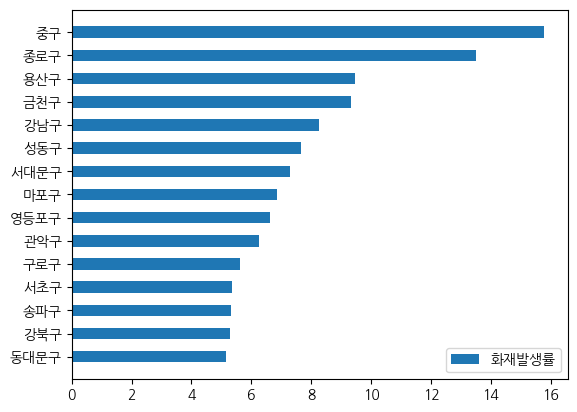

In [21]:
화재발생 = data3
담당인구 = data4

화재발생.rename(columns={'동별(2)' : '자치구별', '2022':'소계'}, inplace=True)
담당인구.rename(columns={'자치구별(2)':'자치구별', '2022.2' : '소방서1개소당담당인구'}, inplace=True)

화재발생 = 화재발생[['자치구별', '소계']]
담당인구 = 담당인구[['자치구별', '소방서1개소당담당인구']]

merged_data = pd.merge(화재발생, 담당인구, on='자치구별', how='outer')

merged_data.drop(index=[0,1,2,3,29], axis=0, inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data

merged_data['소계'] = merged_data.소계.astype('float')
merged_data['소방서1개소당담당인구'] = merged_data.소방서1개소당담당인구.astype('float')
#merged_data.info()

merged_data['화재발생률'] = merged_data['소계'] / merged_data['소방서1개소당담당인구'] * 10000
#merged_data

sorted_data = merged_data.sort_values(['화재발생률'], ascending=False)
#sorted_data

top15 = sorted_data.head(15).sort_values(['화재발생률'], ascending=True)

pos =  np.arange(len(top15))
화재발생률 = top15["화재발생률"].apply(pd.to_numeric, errors='coerce')
자치구별 = top15["자치구별"]

plt.yticks(pos, 자치구별)
plt.barh(pos, 화재발생률, label='화재발생률', height=0.5)
plt.legend()

plt.show()

4. 안전센터와 소방시설 지도

In [22]:
안전센터 = data1[data1['서소이름'].str.contains('소방서') == False]
소방서   = data1[data1['서소이름'].str.contains('소방서') == True]

map2 = folium.Map(location=[37.4965, 126.9572],
                        zoom_start=11,
                        control_scale=True,
                        tiles='openstreetmap')


for i, row in 안전센터.iterrows():
  서소이름 = row['서소이름']
  위도 = row['위도']
  경도 = row['경도']

  mk = folium.Marker([위도, 경도],
                     popup=folium.Popup(서소이름, max_width=200),
                     icon=folium.Icon(color='darkgreen', icon='fire-extinguisher', prefix='fa'))
  mk.add_to(map2)

for i, row in 소방서.iterrows():
  서소이름 = row['서소이름']
  위도 = row['위도']
  경도 = row['경도']

  mk = folium.Marker([위도, 경도],
                     popup=folium.Popup(서소이름, max_width=200),
                     icon=folium.Icon(color='darkred', icon='fire', prefix='fa'))
  mk.add_to(map2)


map2